# Pymaceuticals Inc.
--------------------------------------------------------------------------------------------------
### Analysis

The study results show that dr

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from jupyterthemes import jtplot
#sets plot styles to match jupyter theme
jtplot.style('grade3')

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
drug_results = pd.merge(study_results, mouse_metadata, on = "Mouse ID", how = "left")
# Display the data table for preview
drug_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
total_mice = drug_results['Mouse ID'].nunique()
total_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#.duplicated checks both mouse id AND timepoint for duplicates - creates a list of them  
#then check the Mouse ID column for the unique mouse ID
duplicate_mice_id = drug_results.loc[drug_results.duplicated(['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice_id

array(['g989'], dtype=object)

In [4]:
#Get all the data for the duplicate mouse ID. 

#checks to see if duplicate mice id is in the Mouse ID column. If it is (True), keep those rows.
duplicate_id_data = drug_results[drug_results['Mouse ID'].isin(duplicate_mice_id)==True]
duplicate_id_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

#checks to see if duplicate mice id is in the Mouse ID column. If not (False), drop the row.
mice_data = drug_results[drug_results['Mouse ID'].isin(duplicate_mice_id)==False]
mice_data 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
#Checking the number of mice in the cleaned dataframe
new_total_mice = mice_data['Mouse ID'].nunique()
new_total_mice

248

# Summary Statistics

In [7]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_mean = mice_data.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
drug_vol = mice_data.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
drug_var = mice_data.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
drug_sd = mice_data.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
drug_sem = mice_data.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']
# Assemble the resulting series into a single summary DataFrame.
stats_summary = pd.DataFrame({'Mean Tumor Volume':drug_mean, 'Median Tumor Volume':drug_vol,
                              'Tumor Volume Variance':drug_var, 'Tumor Volume Std. Dev.':drug_sd,
                              'Tumor Volume Std. Err.':drug_sem})
stats_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
drug_stats = mice_data.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)':['mean','median','var',
                                                                            'std','sem']})
drug_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

# Bar and Pie Charts

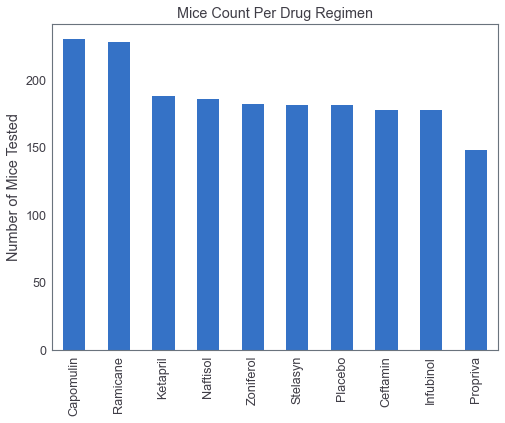

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

#Get the counts of each mice/drug
drug_mice = mice_data['Drug Regimen'].value_counts()
#Create bar graph to plot the df created above
fig1 = drug_mice.plot(kind = 'bar', figsize = (8,6), title = "Mice Count Per Drug Regimen")
#Set a y axis label
fig1.set(ylabel = 'Number of Mice Tested')
#hide the gridlines
fig1.grid()

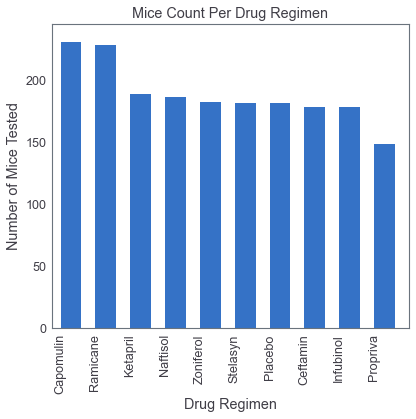

In [11]:
#Mice count per drug regimen
drug_mice = mice_data['Drug Regimen'].value_counts()

#plot the bar graph
plt.bar(drug_mice.index.values,drug_mice.values, align = 'edge', width = 0.60)

#Set limits, add titles, and axis labels
plt.xticks(rotation = 'vertical')
plt.xlim(-0.25, len(drug_mice.index.values))
plt.ylim(0, max(drug_mice.values) + 15)
plt.title('Mice Count Per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.grid()

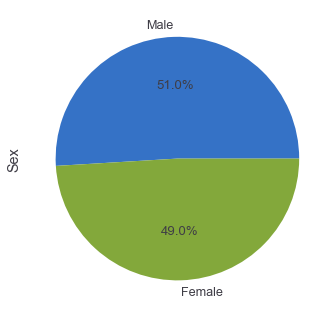

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#Total counts for each gender
gender_counts = mice_data['Sex'].value_counts()

#create pie chart
fig2 = gender_counts.plot(kind = 'pie', labels = ['Male','Female'], autopct = '%1.1f%%')

Text(0, 0.5, 'Sex')

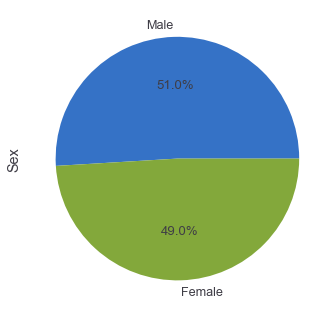

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#Total counts for each gender
gender_counts = mice_data['Sex'].value_counts()

#create pie chart
plt.pie(gender_counts, labels = ['Male','Female'], autopct = '%1.1f%%')
plt.ylabel('Sex')

# Quartiles, Outliers, & Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_time = mice_data.groupby(['Mouse ID'])['Timepoint'].max()
greatest_time = greatest_time.reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(mice_data,greatest_time, on = ['Mouse ID','Timepoint'], how = 'right')

In [19]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments: 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_df.loc[merged_df["Drug Regimen"] == drug, 'Tumor Volume (mm3)']  
    # add subset 
    tumor_vol.append(final_tumor_vol)
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
#IQR Calc.
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
#Find outliers
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 20    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


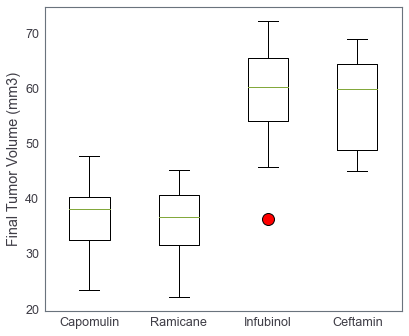

In [20]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

#marker set
red_mark = dict(markerfacecolor='red',markersize=12)
plt.ylabel('Final Tumor Volume (mm3)')

#plot boxplot
plt.boxplot(tumor_vol,labels = treatments, flierprops= red_mark)
plt.grid()
plt.show()

# Line & Scatter Plot

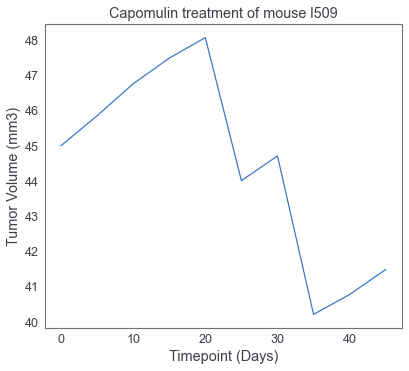

In [21]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#Filter the data for just Capomulin and Mouse ID = l509
capomul_mice = mice_data.loc[(mice_data["Drug Regimen"] == 'Capomulin') & (mice_data["Mouse ID"] == 'l509') ]

#plot the timepoint and tumor volume for the drug
plt.plot(capomul_mice['Timepoint'],capomul_mice['Tumor Volume (mm3)'])
plt.title('Capomulin treatment of mouse l509')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid()

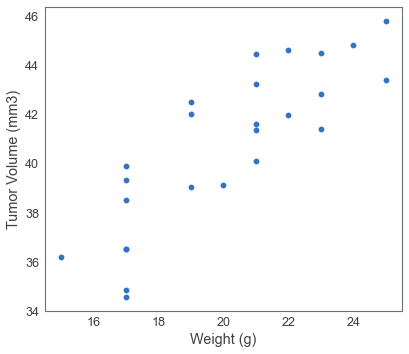

In [22]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#Filter the df from Capomulin 
capomulin_filter = mice_data.loc[(mice_data["Drug Regimen"] == 'Capomulin')]
#Get the means for numeric values when grouped by Mouse ID
mouse_means = capomulin_filter.groupby(['Mouse ID']).mean()

#Create the scatter plot 
plt.scatter(mouse_means['Weight (g)'],mouse_means['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid()


# Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


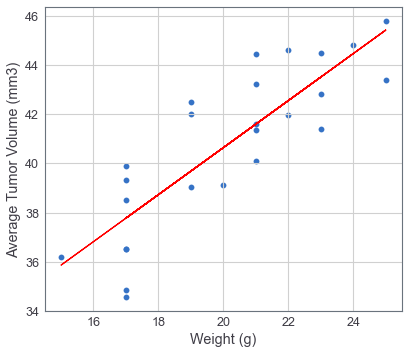

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#Get the correlation value for weight and tumor vol. and print it out
correlation = round(st.pearsonr(mouse_means['Weight (g)'],mouse_means['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {correlation}")

#linear regression values 
linear_reg = st.linregress(mouse_means['Weight (g)'],mouse_means['Tumor Volume (mm3)'])

#use y= mx +b for linear regression line.
y_mxb = mouse_means['Weight (g)']*linear_reg[0]+linear_reg[1]

#Create scatter plot
plt.scatter(mouse_means['Weight (g)'],mouse_means['Tumor Volume (mm3)'])

#Plot the linear regression line on the scatter 
plt.plot(mouse_means['Weight (g)'],y_mxb,color="red")

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()